In [1]:
import glob
import numpy as np
import pandas as pd
#from ipynb.fs.full.uda_functions import makeWordList, read_docs

In [2]:
# Import data file created by Laura
# Drop duplicates and dropped "Unnamed: 0", "indic_id", "indic_name", "indic val" columns -- create new smaller dataframe df_small

import csv
df = pd.read_csv('/Users/ashit/Desktop/2019-2020/Spring 2020/94-775 UDA/FinalProject/db_final.txt')
df_small = df.drop_duplicates(subset=['year', 'countryID'])
df_small = df_small[['session', 'year', 'countryID', 'country_name', 'region',
       'statement', 'speaker', 'speaker_post', 'income_level', 'language']]

In [3]:
# Convert long-to-wide using year and countryID as the index columns

df_wide = df.pivot_table(index = ['year', 'countryID'], columns = 'indic_name', values = 'indic_val', dropna=False)

In [4]:
# Merge df_small with df_wide to get final_df where each row is a unique (year, country) combination

final_df = pd.merge(df_wide, df_small , on = ['year', 'countryID'])

In [5]:
# Write to csv file

final_df.to_csv('final_df.csv')

In [6]:
# Creates a new column that stores the length of each speech
# Then groups by region and calculates the average length of the speeches

regions = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa',
           'North America', 'South Asia', 'Sub-Saharan Africa']

length = []
for i in final_df.statement:
    length.append(len(i))
final_df['statement_length'] = pd.DataFrame(length)
avgs = final_df.groupby("region")["statement_length"].mean()

avgs_by_region = {}
for i in range(len(regions)): 
    avgs_by_region[regions[i]] = avgs[i]

# Create histogram to visualize the avg length of speeches across all years by region
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display

plot_range = len(regions)
entity_labels = avgs_by_region.keys()
label_counts = avgs_by_region.values()
plt.bar(range(plot_range), label_counts)
plt.xticks(range(plot_range), entity_labels, rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Length of Speech')

Text(0, 0.5, 'Average Length of Speech')

Text(0, 0.5, 'Average Length of Speech')

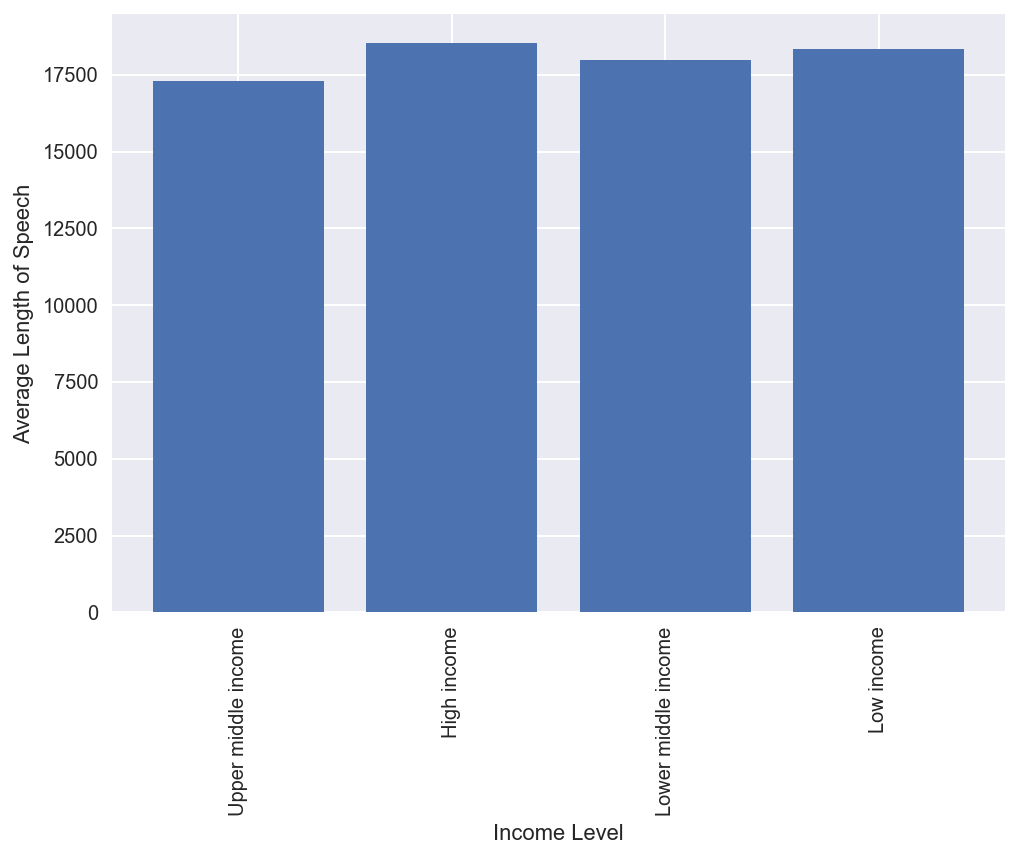

In [7]:
# Creates a new column that stores the length of each speech
# Then groups by income_level and calculates the average length of the speeches

income_level = ['Upper middle income', 'High income', 'Lower middle income', 'Low income']

length = []
for i in final_df.statement:
    length.append(len(i))
final_df['statement_length'] = pd.DataFrame(length)
avgs = final_df.groupby("income_level")["statement_length"].mean()

avgs_by_income_level = {}
for i in range(len(income_level)): 
    avgs_by_income_level[income_level[i]] = avgs[i]

# Create histogram to visualize the avg length of speeches across all years by income level
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display

plot_range = len(income_level)
entity_labels = avgs_by_income_level.keys()
label_counts = avgs_by_income_level.values()
plt.bar(range(plot_range), label_counts)
plt.xticks(range(plot_range), entity_labels, rotation=90)
plt.xlabel('Income Level')
plt.ylabel('Average Length of Speech')

In [8]:
# # Top 10 words by region

# from operator import itemgetter
# custom_stop_words = ['united', 'nations', 'country', 'international', 'world', 'people', 'development', 'new', 'states', 'organization', 'assembly', 'right',
#                     'year', 'organization', 'support', 'general']

# for i in regions: 
#     region_speeches = []
#     for j in range(len(final_df.region)): 
#         if final_df.region[j] == i: 
#             region_speeches.append(final_df.statement[j])
#     histogram1 = {}
#     for text in region_1_speeches: 
#         parsed_text = nlp(text)
#         for token in parsed_text:
#             original_lemma_text = token.lemma_.lower()
#             if re.match('[a-zA-Z]+$', original_lemma_text) and not(nlp.vocab[original_lemma_text].is_stop) and original_lemma_text not in custom_stop_words:
#                 if original_lemma_text not in histogram1:
#                     histogram1[original_lemma_text] = 1
#                 else:
#                     histogram1[original_lemma_text] += 1
#             else:
#                 continue
#     sorted_lemma_count_pairs = sorted(histogram1.items(), reverse=True, key=itemgetter(1))
#     rank = 1
#     sorted_lemma_dict = {}
#     for lemma, count in sorted_lemma_count_pairs:
#         sorted_lemma_dict[lemma] = (count, rank)
#         rank += 1

#     for key in sorted_lemma_dict:
#         if sorted_lemma_dict[key][1] <= 10:
#             print("%s: freq = %d, rank = %d" % (key, sorted_lemma_dict[key][0], sorted_lemma_dict[key][1]))            

# Sentiment Analysis

In [9]:
final_df['decade'] = 0
for x in range(len(final_df['year'])):
    if final_df.loc[x,'year'] >= 1970 and final_df.loc[x,'year'] <= 1979:
        final_df.loc[x,'decade'] = '1970s'
    elif final_df.loc[x,'year'] >= 1980 and final_df.loc[x,'year'] <= 1989:
        final_df.loc[x,'decade'] = '1980s'
    elif final_df.loc[x,'year'] >= 1990 and final_df.loc[x,'year'] <= 1999:
        final_df.loc[x,'decade'] = '1990s'
    elif final_df.loc[x,'year'] >= 2000 and final_df.loc[x,'year'] <= 2009:
        final_df.loc[x,'decade'] = '2000s'
    else:
        final_df.loc[x,'decade'] = '2010-2015'
final_df.columns

Index(['year', 'countryID',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Adjusted savings: natural resources depletion (% of GNI)',
       'Adjusted savings: net forest depletion (% of GNI)',
       'Agricultural land (% of land area)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)',
       'CO2 emissions (metric tons per capita)',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
       'Children in employment, total (% of children ages 7-14)',
       'Control of Corruption: Estimate',
       'Cooling Degree Days (projected change in number of degree Celsius)',
       'Droughts, floods, extreme temperatures (% of population, av

In [10]:
from textblob import TextBlob
final_df['polarity'] = final_df['statement'].apply(lambda x: TextBlob(x).sentiment.polarity)
final_df['subjectivity'] = final_df['statement'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

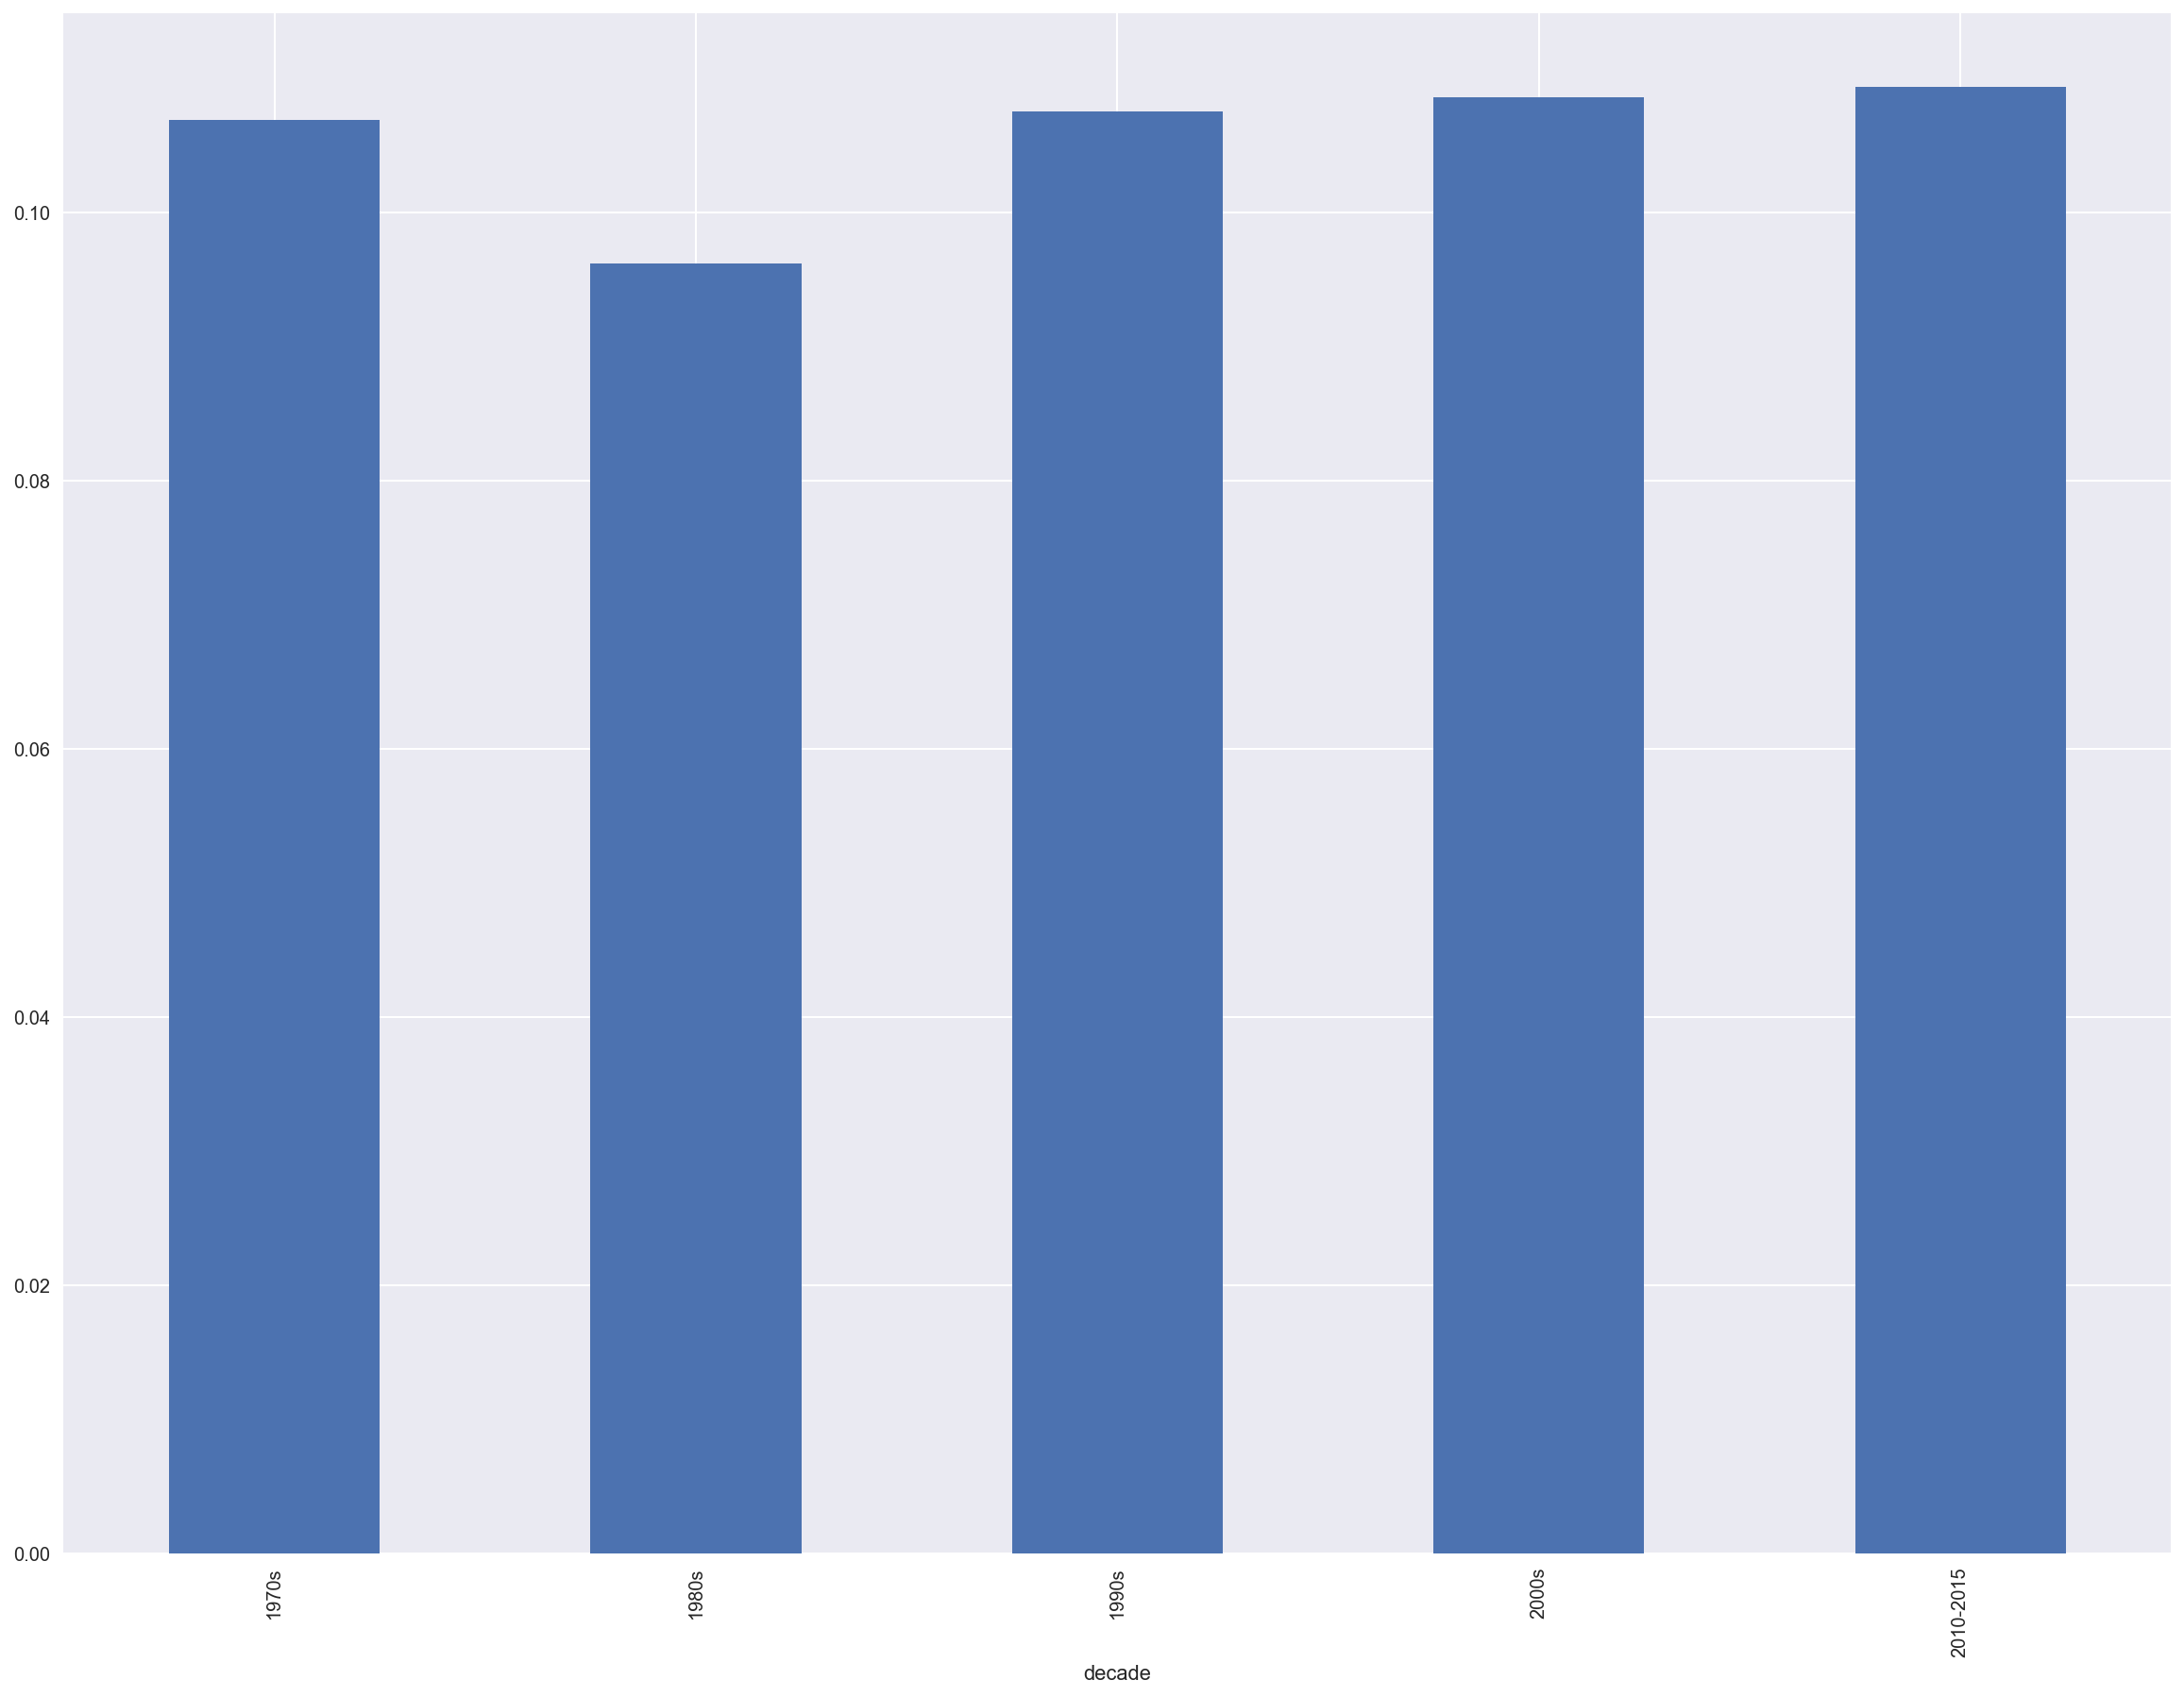

In [11]:
# Plot polarity by decade
plt.subplots(figsize=(20,15))  
final_df.groupby('decade')['polarity'].mean().plot.bar()

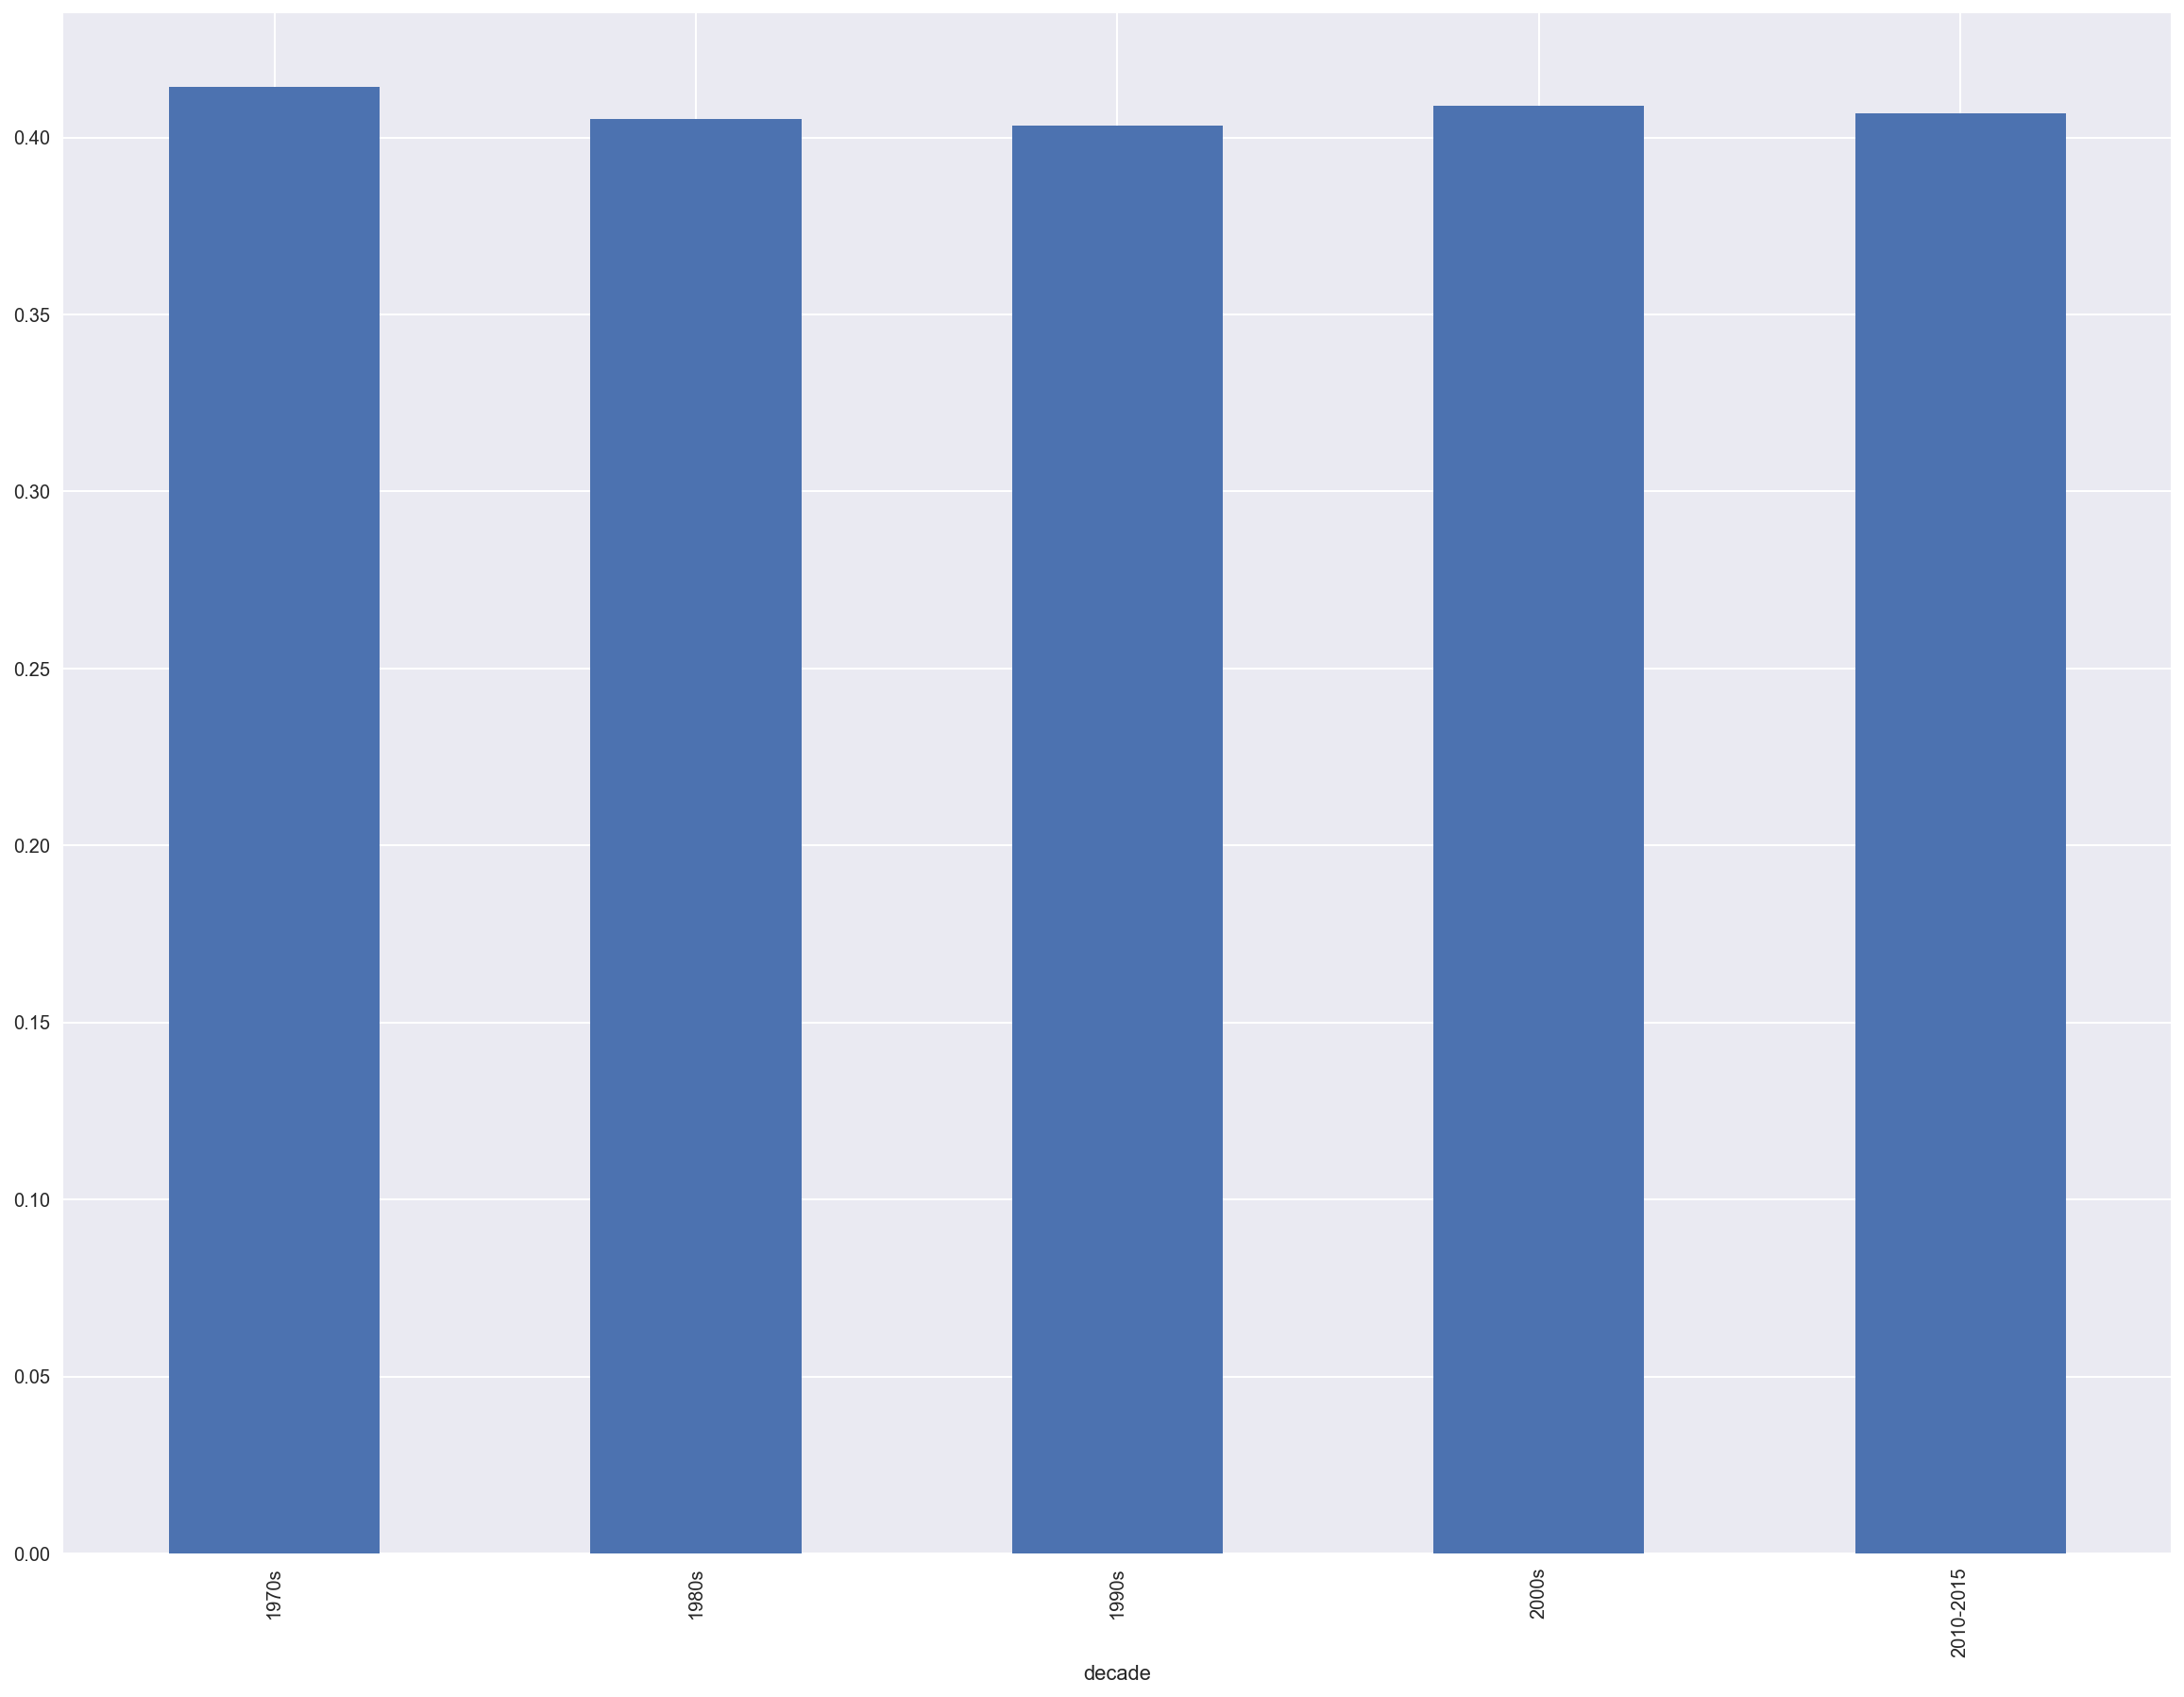

In [12]:
# Plot subjectivity by decade
plt.subplots(figsize=(20,15))  
final_df.groupby('decade')['subjectivity'].mean().plot.bar()

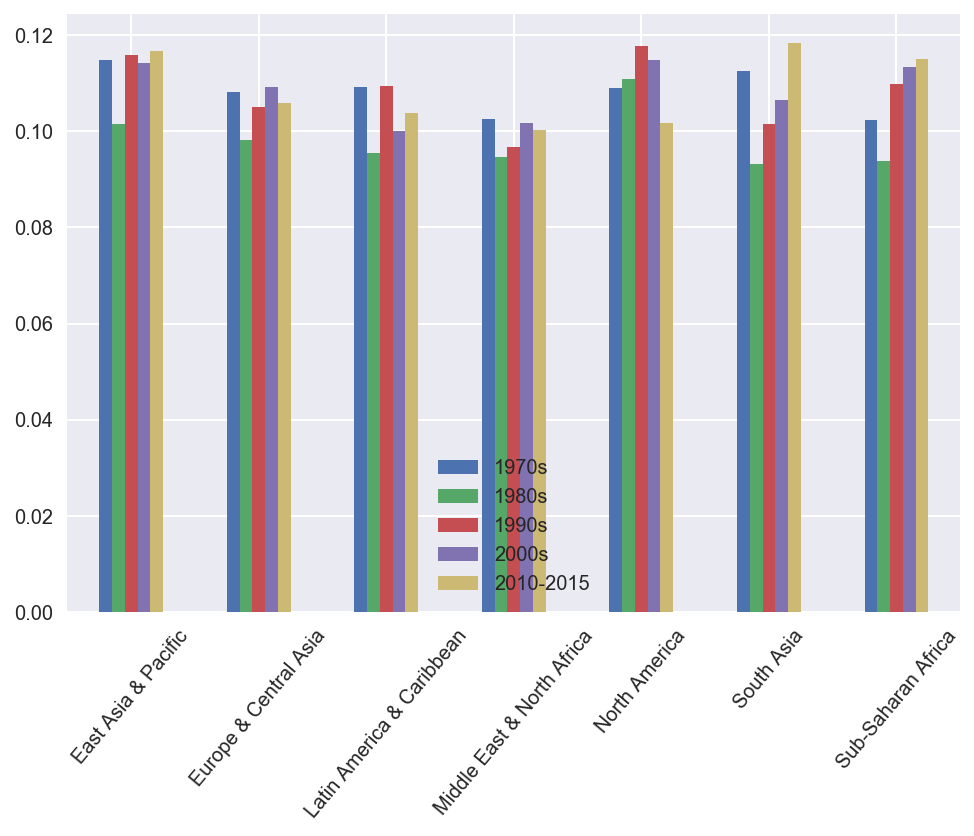

In [13]:
# Plot polarity by decade and region

# Creates a new column that stores the length of each speech
# Then groups by region and calculates the average length of the speeches

regions = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa',
           'North America', 'South Asia', 'Sub-Saharan Africa']

length = []
for i in final_df.statement:
    length.append(len(i))
final_df['statement_length'] = pd.DataFrame(length)
avgs = final_df.groupby(['region', 'decade'])['polarity'].mean()

avg_stmt_lengths = []

decades = ['1970s', '1980s', '1990s', '2000s', '2010-2015']
for decade in decades:
    avg_stmt_lengths.append(list(avgs.loc[region][decade] for region in regions))


df = pd.DataFrame({'1970s': avg_stmt_lengths[0],
                   '1980s': avg_stmt_lengths[1],
                  '1990s': avg_stmt_lengths[2],
                  '2000s': avg_stmt_lengths[3],
                  '2010-2015': avg_stmt_lengths[4]},
                  index=regions)
ax = df.plot.bar(rot=50)

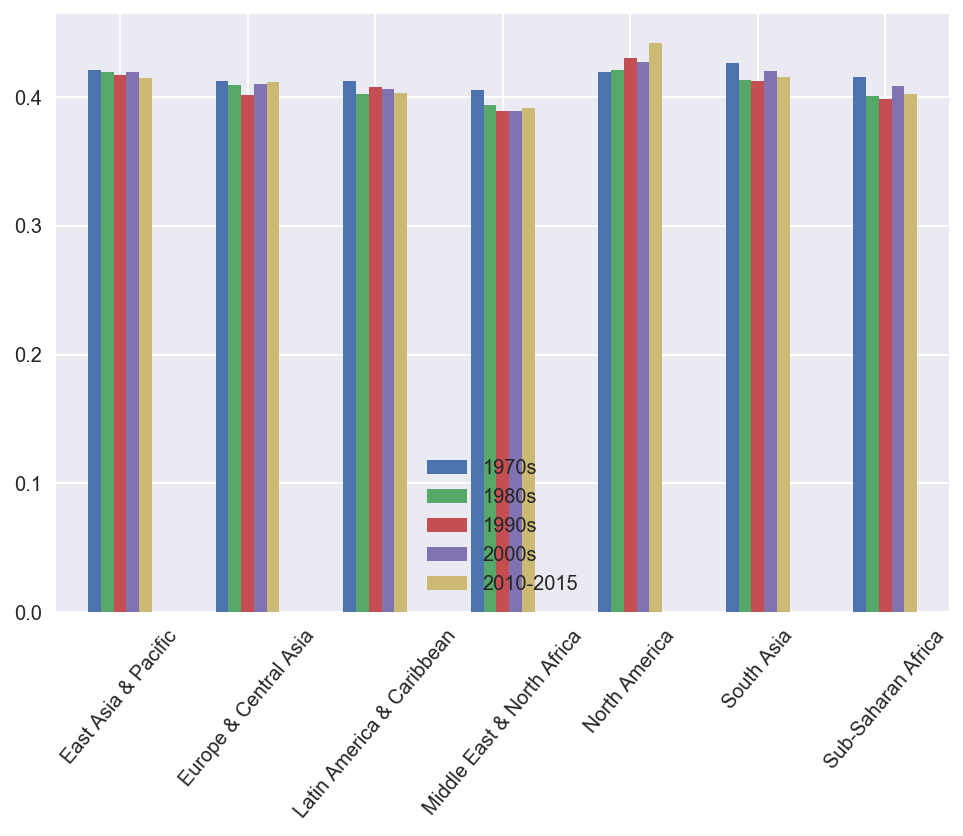

In [14]:
# Plot subjectivity by decade and region

# Creates a new column that stores the length of each speech
# Then groups by region and calculates the average length of the speeches

regions = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa',
           'North America', 'South Asia', 'Sub-Saharan Africa']

length = []
for i in final_df.statement:
    length.append(len(i))
final_df['statement_length'] = pd.DataFrame(length)
avgs = final_df.groupby(['region', 'decade'])['subjectivity'].mean()

avg_stmt_lengths = []

decades = ['1970s', '1980s', '1990s', '2000s', '2010-2015']
for decade in decades:
    avg_stmt_lengths.append(list(avgs.loc[region][decade] for region in regions))


df = pd.DataFrame({'1970s': avg_stmt_lengths[0],
                   '1980s': avg_stmt_lengths[1],
                  '1990s': avg_stmt_lengths[2],
                  '2000s': avg_stmt_lengths[3],
                  '2010-2015': avg_stmt_lengths[4]},
                  index=regions)
ax = df.plot.bar(rot=50)

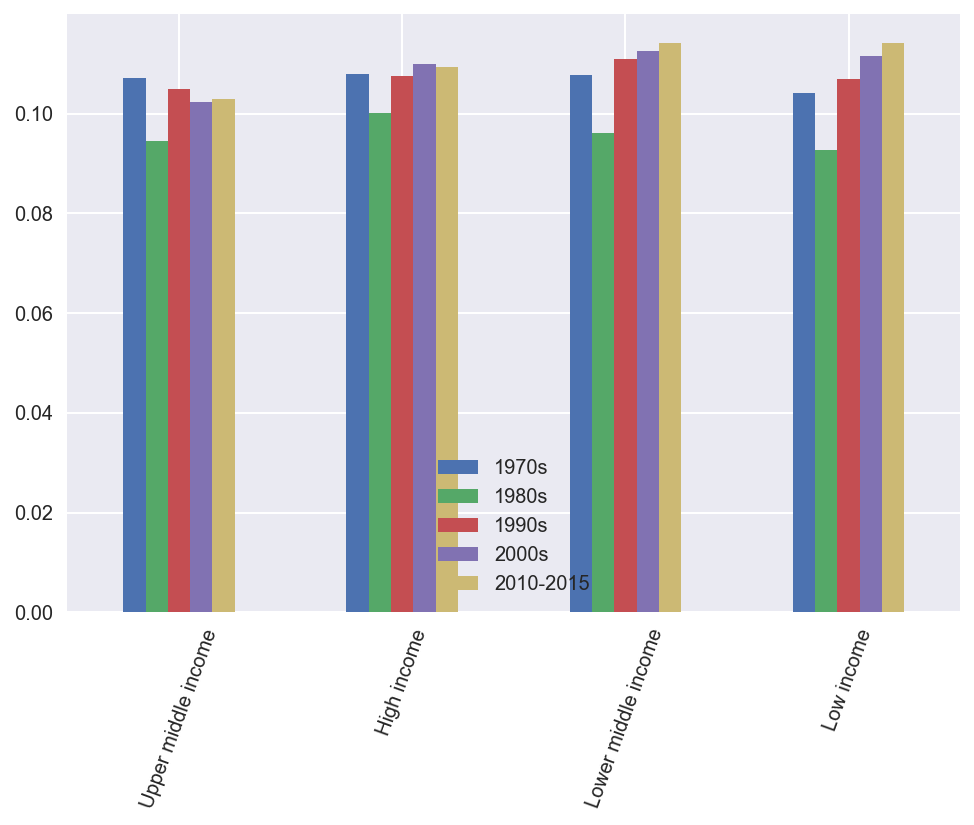

In [15]:
# Plot polarity by decade and income group

### Creates a new column that stores the length of each speech
# Then groups by income_level and calculates the average length of the speeches

income_level = ['Upper middle income', 'High income', 'Lower middle income', 'Low income']

length = []
for i in final_df.statement:
    length.append(len(i))
final_df['statement_length'] = pd.DataFrame(length)
avgs = final_df.groupby(['income_level', 'decade'])['polarity'].mean()

avg_stmt_lengths = []

decades = ['1970s', '1980s', '1990s', '2000s', '2010-2015']
for decade in decades:
    avg_stmt_lengths.append(list(avgs.loc[income][decade] for income in income_level))


df = pd.DataFrame({'1970s': avg_stmt_lengths[0],
                   '1980s': avg_stmt_lengths[1],
                  '1990s': avg_stmt_lengths[2],
                  '2000s': avg_stmt_lengths[3],
                  '2010-2015': avg_stmt_lengths[4]},
                  index=income_level)
ax = df.plot.bar(rot=70)

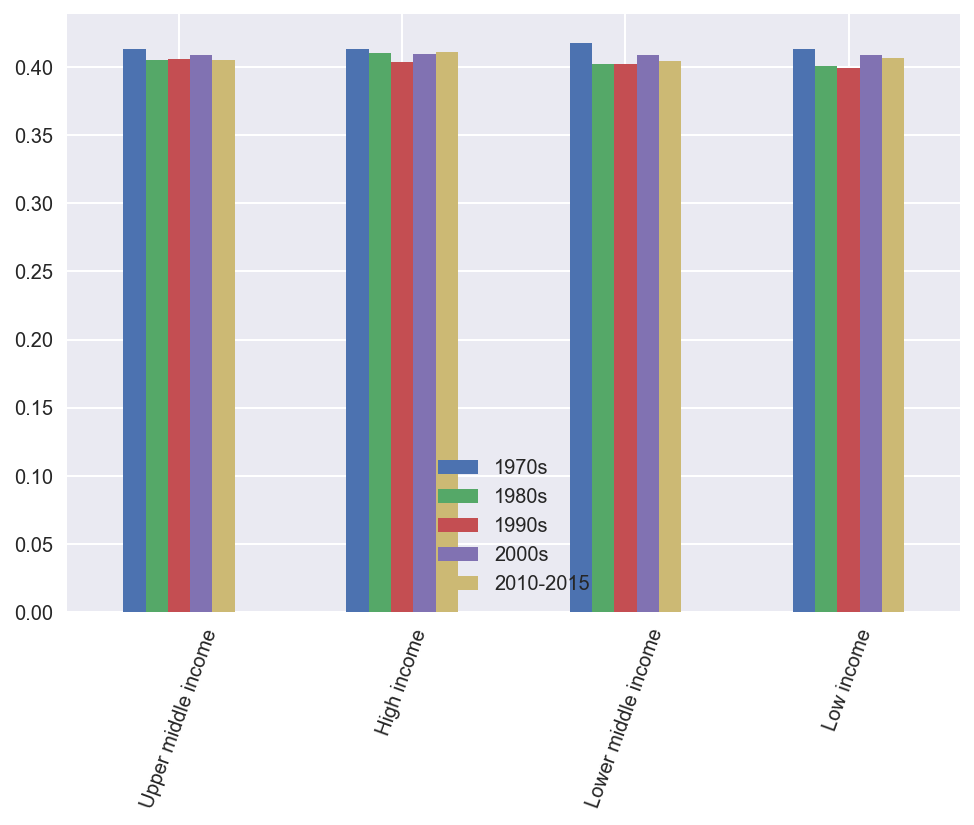

In [16]:
# Plot subjectivity by decade and income group
### Creates a new column that stores the length of each speech
# Then groups by income_level and calculates the average length of the speeches

income_level = ['Upper middle income', 'High income', 'Lower middle income', 'Low income']

length = []
for i in final_df.statement:
    length.append(len(i))
final_df['statement_length'] = pd.DataFrame(length)
avgs = final_df.groupby(['income_level', 'decade'])['subjectivity'].mean()

avg_stmt_lengths = []

decades = ['1970s', '1980s', '1990s', '2000s', '2010-2015']
for decade in decades:
    avg_stmt_lengths.append(list(avgs.loc[income][decade] for income in income_level))


df = pd.DataFrame({'1970s': avg_stmt_lengths[0],
                   '1980s': avg_stmt_lengths[1],
                  '1990s': avg_stmt_lengths[2],
                  '2000s': avg_stmt_lengths[3],
                  '2010-2015': avg_stmt_lengths[4]},
                  index=income_level)
ax = df.plot.bar(rot=70)

In [17]:
a = final_df.groupby(['decade', 'country_name'])['polarity'].mean()
a.nlargest(n=5)

decade     country_name
2010-2015  Burkina Faso    0.169508
1990s      Eswatini        0.157500
1970s      Malawi          0.154083
2010-2015  Bhutan          0.152945
           Eswatini        0.148912
Name: polarity, dtype: float64

In [35]:
test = []
for i in decades: 
    print(i)
    print(a.loc[i].nlargest(n=5))
    print(a.loc[i].nsmallest(n=5))

1970s
country_name
Malawi      0.154083
Maldives    0.141341
Gabon       0.137435
Bhutan      0.133200
Bolivia     0.130733
Name: polarity, dtype: float64
country_name
Djibouti        0.062584
Lesotho         0.068497
Bahamas, The    0.072745
Israel          0.073008
Somalia         0.077017
Name: polarity, dtype: float64
1980s
country_name
Malawi               0.130277
Solomon Islands      0.127340
Brunei Darussalam    0.125223
Japan                0.122685
Yemen, Rep.          0.121178
Name: polarity, dtype: float64
country_name
Iran, Islamic Rep.    0.056457
Dominica              0.060465
Ethiopia              0.069111
Cuba                  0.069291
Somalia               0.069663
Name: polarity, dtype: float64
1990s
country_name
Eswatini             0.157500
Cambodia             0.147474
Paraguay             0.146557
Brunei Darussalam    0.143976
Monaco               0.137697
Name: polarity, dtype: float64
country_name
Iran, Islamic Rep.    0.065890
Pakistan              0.072821
Ir

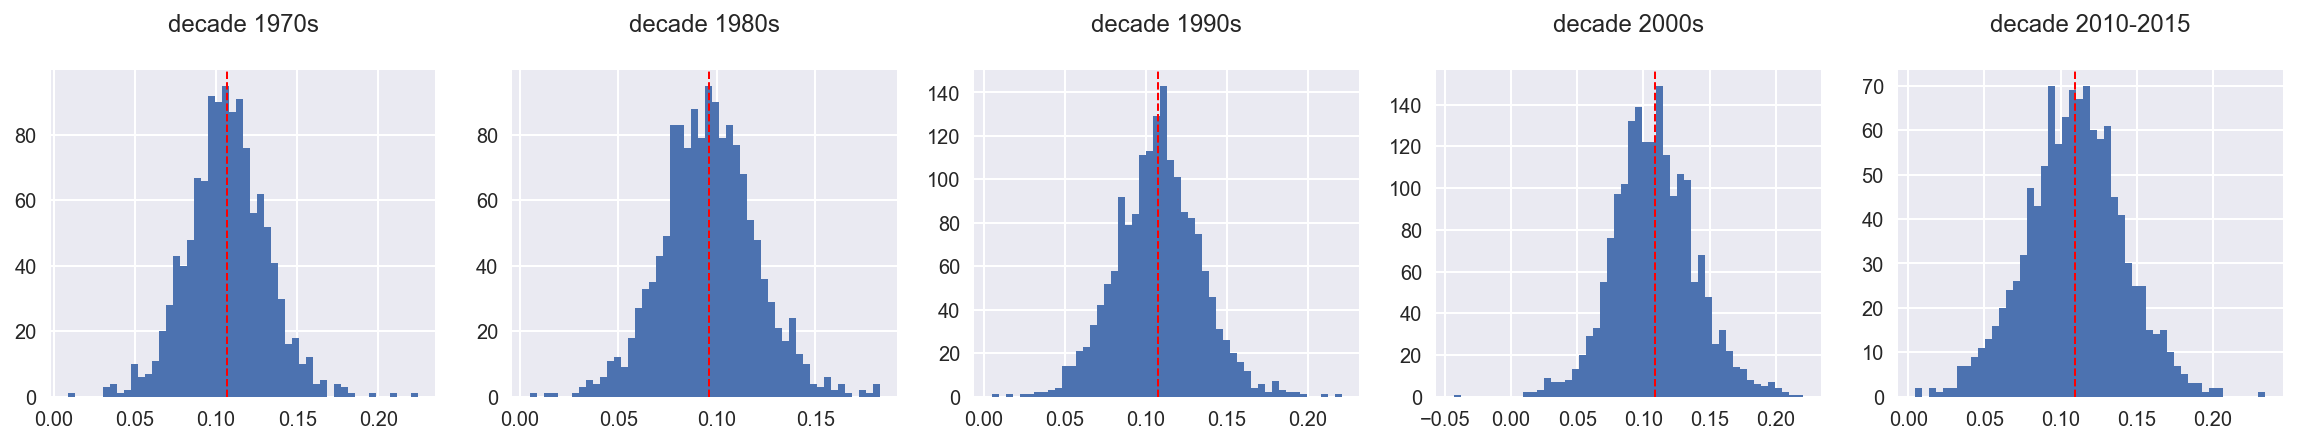

In [41]:
# Polarity over decades
plt.figure(figsize = (20,3))
for i,j in enumerate(['1970s', '1980s', '1990s', '2000s', '2010-2015']):
    temp = final_df[(final_df.decade == j)]['polarity']
   
    plt.subplot(1,5,i+1)
    plt.hist(temp, bins=50)
    plt.title('decade ' + str(j) + '\n')
    plt.axvline(temp.mean(), color='r', linestyle='dashed', linewidth=1)

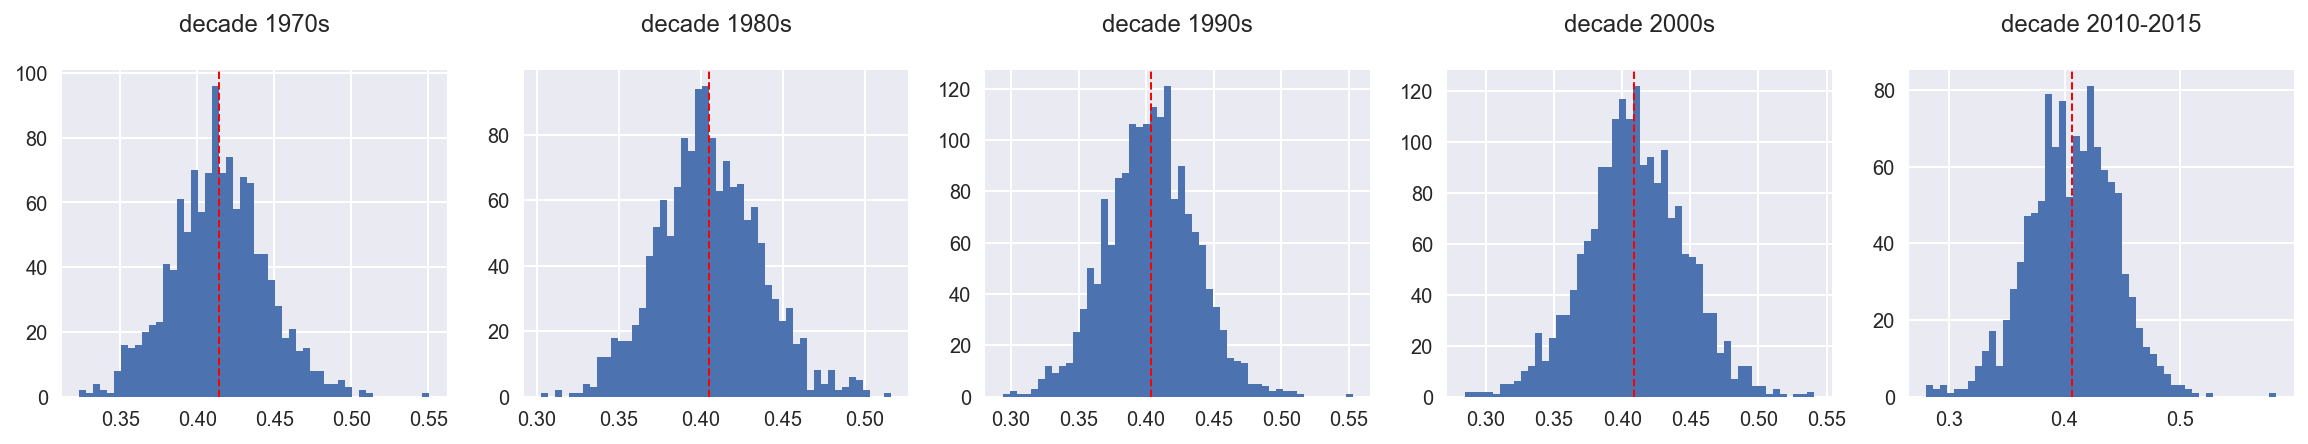

In [42]:
# Subjectivity over decades
plt.figure(figsize = (20,3))
for i,j in enumerate(['1970s', '1980s', '1990s', '2000s', '2010-2015']):
    temp = final_df[(final_df.decade == j)]['subjectivity']
   
    plt.subplot(1,5,i+1)
    plt.hist(temp, bins=50)
    plt.title('decade ' + str(j) + '\n')
    plt.axvline(temp.mean(), color='r', linestyle='dashed', linewidth=1)

In [ ]:
##### TO BE DONE #####
# Sentiment analysis by topic



# Topic 1 -- War
final_df['polarity'] = final_df['statement'].apply(lambda x: TextBlob(x).sentiment.polarity)
final_df['subjectivity'] = final_df['statement'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Topic 2 -- Military
final_df['polarity'] = final_df['statement'].apply(lambda x: TextBlob(x).sentiment.polarity)
final_df['subjectivity'] = final_df['statement'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Topic 3 -- Climate Change
final_df['polarity'] = final_df['statement'].apply(lambda x: TextBlob(x).sentiment.polarity)
final_df['subjectivity'] = final_df['statement'].apply(lambda x: TextBlob(x).sentiment.subjectivity)